In [4]:
import geopandas as gpd
import pandas as pd


In [31]:
shapefile_path = "UScounties.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.head())
# gdf.plot()

                NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
0  Lake of the Woods   Minnesota         27       077  27077   
1              Ferry  Washington         53       019  53019   
2            Stevens  Washington         53       065  53065   
3           Okanogan  Washington         53       047  53047   
4       Pend Oreille  Washington         53       051  53051   

                                            geometry  
0  POLYGON ((-95.34283 48.54668, -95.34105 48.715...  
1  POLYGON ((-118.85163 47.94956, -118.84846 48.4...  
2  POLYGON ((-117.43883 48.04412, -117.54219 48.0...  
3  POLYGON ((-118.97209 47.93915, -118.97406 47.9...  
4  POLYGON ((-117.43858 48.99992, -117.03205 48.9...  


In [6]:
# pd.read_csv("covidData2021-2022.csv", dtype={'date': pd.StringDtype(), 'county': pd.StringDtype(), 'state': pd.StringDtype(), 'fips': pd.StringDtype(), 'cases': pd.Int64Dtype(), 'deaths': pd.Int64Dtype()},keep_default_na=False,na_values=pd.NA)
covid_data=pd.read_csv("covidData2021-2022.csv")


covid_data["date"] = pd.to_datetime(covid_data["date"])
print(covid_data.head(-20))
print(covid_data.info())

              date     county       state     fips  cases  deaths
0       2020-01-21  Snohomish  Washington  53061.0      1     0.0
1       2020-01-22  Snohomish  Washington  53061.0      1     0.0
2       2020-01-23  Snohomish  Washington  53061.0      1     0.0
3       2020-01-24       Cook    Illinois  17031.0      1     0.0
4       2020-01-24  Snohomish  Washington  53061.0      1     0.0
...            ...        ...         ...      ...    ...     ...
2502807 2022-05-13  Winnebago   Wisconsin  55139.0  53045   382.0
2502808 2022-05-13       Wood   Wisconsin  55141.0  21477   233.0
2502809 2022-05-13     Albany     Wyoming  56001.0   9934    49.0
2502810 2022-05-13   Big Horn     Wyoming  56003.0   2586    61.0
2502811 2022-05-13   Campbell     Wyoming  56005.0  12113   149.0

[2502812 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date   

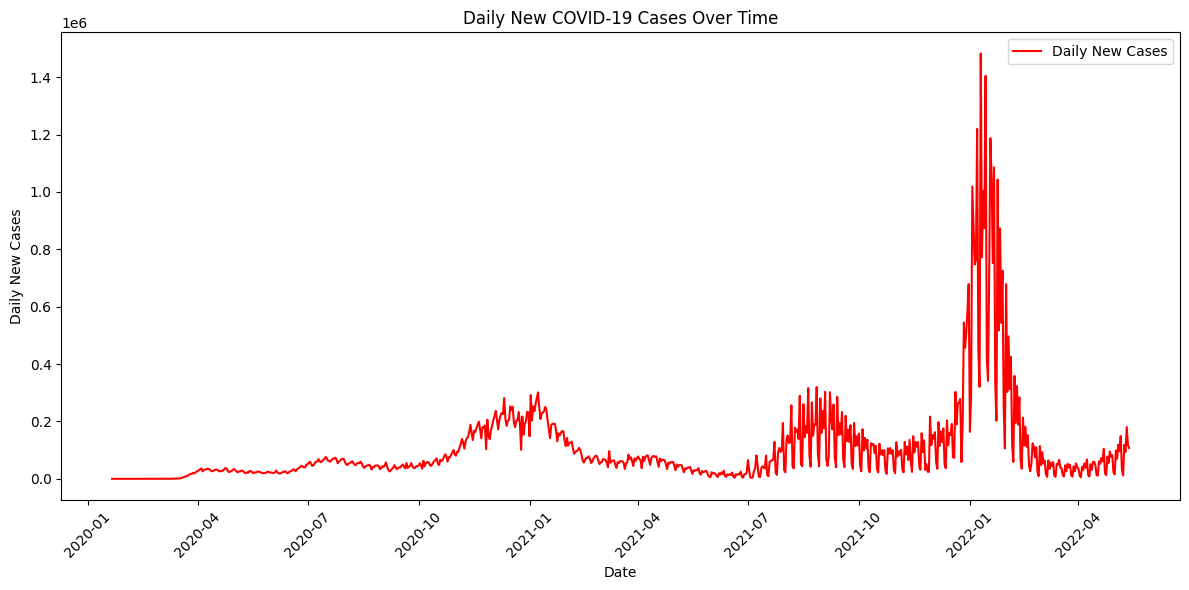

In [7]:
import matplotlib.pyplot as plt

# Assuming the data is already loaded and named as `df`
covid_data['daily_new_cases'] = covid_data.groupby(['county', 'state'])['cases'].diff().fillna(covid_data['cases'])
covid_data['daily_new_cases'] = covid_data['daily_new_cases'].apply(lambda x: x if x >= 0 else 0)

# Summing up daily new cases across all counties and states for each day
daily_new_cases = covid_data.groupby('date')['daily_new_cases'].sum().reset_index()

# Plotting the daily new COVID-19 cases
plt.figure(figsize=(12, 6))
plt.plot(daily_new_cases['date'], daily_new_cases['daily_new_cases'], label='Daily New Cases', color='red')
plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

# Convert 'date' to datetime object
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Find the end of week date (Friday) for each entry
covid_data['end_of_week'] = covid_data['date'] + pd.to_timedelta(
    (4 - covid_data['date'].dt.weekday) % 7, unit='d')

# Now group by 'end_of_week' and 'fips' and sum the 'daily_new_cases'
weekly_cases = covid_data.groupby(['fips','state', 'end_of_week'])['daily_new_cases'].sum().reset_index()

# This DataFrame 'weekly_cases' now has weekly summed cases for each FIPS code.
weekly_cases.head(20)

,fips,state,end_of_week,daily_new_cases
0,1001.0,Alabama,2020-03-27,6.0
1,1001.0,Alabama,2020-04-03,6.0
2,1001.0,Alabama,2020-04-10,5.0
3,1001.0,Alabama,2020-04-17,9.0
4,1001.0,Alabama,2020-04-24,11.0
5,1001.0,Alabama,2020-05-01,7.0
6,1001.0,Alabama,2020-05-08,25.0
7,1001.0,Alabama,2020-05-15,37.0
8,1001.0,Alabama,2020-05-22,46.0
9,1001.0,Alabama,2020-05-29,63.0


In [9]:
# Assuming 'weekly_cases' DataFrame has 'fips' and 'end_of_week' columns from earlier steps
fips_weeks = pd.merge(weekly_cases[["fips", "state"]].drop_duplicates(), weekly_cases[["end_of_week"]].drop_duplicates(), how="cross")
fips_weeks.columns = ["FIPS", "state", "Week"]
fips_weeks.info()
fips_weeks.head(-20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389620 entries, 0 to 389619
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   FIPS    389620 non-null  float64       
 1   state   389620 non-null  object        
 2   Week    389620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.9+ MB


,FIPS,state,Week
0,1001.0,Alabama,2020-03-27
1,1001.0,Alabama,2020-04-03
2,1001.0,Alabama,2020-04-10
3,1001.0,Alabama,2020-04-17
4,1001.0,Alabama,2020-04-24
...,...,...,...
389595,78030.0,Virgin Islands,2022-01-28
389596,78030.0,Virgin Islands,2022-02-04
389597,78030.0,Virgin Islands,2022-02-11
389598,78030.0,Virgin Islands,2022-02-18


In [10]:
# Merge the `weekly_cases` data with `fips_weeks` to associate the number of new cases with each FIPS code and week.
complete_data = pd.merge(fips_weeks, weekly_cases, how='left', left_on=['FIPS', 'state', 'Week'], right_on=['fips', 'state', 'end_of_week'])
complete_data = complete_data[['FIPS', 'state', 'Week', 'daily_new_cases']]
# Fill any NaN values that result from weeks where a FIPS code had no reported cases with zeros.
complete_data['daily_new_cases'] = complete_data['daily_new_cases'].fillna(0)

# You now have a complete dataset to use as input for your Bayesian network.
# Each row represents a node, with columns for the FIPS code, the week, and the number of new cases.

complete_data.head(-20)

,FIPS,state,Week,daily_new_cases
0,1001.0,Alabama,2020-03-27,6.0
1,1001.0,Alabama,2020-04-03,6.0
2,1001.0,Alabama,2020-04-10,5.0
3,1001.0,Alabama,2020-04-17,9.0
4,1001.0,Alabama,2020-04-24,11.0
...,...,...,...,...
389595,78030.0,Virgin Islands,2022-01-28,262.0
389596,78030.0,Virgin Islands,2022-02-04,56.0
389597,78030.0,Virgin Islands,2022-02-11,73.0
389598,78030.0,Virgin Islands,2022-02-18,18.0


In [11]:
import geopandas as gpd

# Assuming this path is correct and points to your shapefile.
shapefile_path = 'UScounties.shp'
counties = gpd.read_file(shapefile_path)
counties["FIPS"] = counties["FIPS"].astype(float)
counties.info()
counties.head(-20)
weekly_cases= None


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        3141 non-null   object  
 1   STATE_NAME  3141 non-null   object  
 2   STATE_FIPS  3141 non-null   object  
 3   CNTY_FIPS   3141 non-null   object  
 4   FIPS        3141 non-null   float64 
 5   geometry    3141 non-null   geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 147.4+ KB


In [12]:
def get_neighbors(fips_code):
    # Ensure the FIPS code is a string if the DataFrame expects it as such
    fips_float = float(fips_code)
    
    # Select the county based on FIPS code
    county = counties[counties['FIPS'] == fips_float]

    # If the county doesn't exist in the DataFrame, return an empty list
    if county.empty:
        
        return []
    
    # Use spatial joins to find neighbors
    neighbors = gpd.sjoin(counties, county, predicate='touches', how='inner')
    # Get the FIPS codes of the neighbors. Depending on your GeoDataFrame, this could be 'FIPS_left' or just 'FIPS'
    neighbor_fips = neighbors['FIPS_left'].tolist()

    # Return a list of neighbors' FIPS codes, excluding the original county's FIPS code
    return [f for f in neighbor_fips if f != fips_float]


In [13]:
get_neighbors(27057.0)

[27007.0, 27029.0, 27021.0, 27005.0, 27159.0]

In [14]:
# Get a sorted list of unique weeks
sampledata= complete_data[complete_data["state"] == "Illinois"]

# def get_potential_edges(data):
#     potential_edges= []
#     unique_weeks = sorted(data['Week'].unique())
#     for i in range(len(unique_weeks) - 1):
#         week = unique_weeks[i]
#         next_week = unique_weeks[i + 1]
#         current_week_fips = data[data['Week'] == week]['FIPS'].unique()
#         next_week_fips = data[data['Week'] == next_week]['FIPS'].unique()

#         for fips in current_week_fips:
#             neighbors = get_neighbors(fips)
#             for neighbor in neighbors:
#                 # Check if each neighbor also has a record in the next week
#                 if neighbor in next_week_fips:
#                     # Append the tuple (current_week_fips, next_week_fips) to the potential edges
#                     source = var_to_str((fips, week))
#                     target = var_to_str((neighbor, next_week))
#                     potential_edges.append((source, target))
#     return potential_edges


def get_potential_edges(data):
    """data comes in with columns ['FIPS', 'state', 'Week', 'daily_new_cases']"""
    potential_edges= []
    fip_list = data["FIPS"].unique()
    for fips in fip_list:
        neighbors = get_neighbors(fips)
        for neighbor in neighbors:
            # Append the tuple (current_week_fips, next_week_fips) to the potential edges
            # Needs to match how `convert_data` names the columns
            source = str(fips) + "_current"
            target = str(neighbor) + "_next"
            potential_edges.append((source, target))
    return potential_edges



In [15]:
potential_edges = get_potential_edges(sampledata)
print(potential_edges)
print(len(potential_edges))

[('17001.0_current', '17067.0_next'), ('17001.0_current', '17169.0_next'), ('17001.0_current', '29111.0_next'), ('17001.0_current', '17009.0_next'), ('17001.0_current', '29127.0_next'), ('17001.0_current', '17149.0_next'), ('17003.0_current', '17181.0_next'), ('17003.0_current', '29031.0_next'), ('17003.0_current', '17153.0_next'), ('17003.0_current', '29201.0_next'), ('17003.0_current', '21007.0_next'), ('17003.0_current', '29133.0_next'), ('17005.0_current', '17135.0_next'), ('17005.0_current', '17051.0_next'), ('17005.0_current', '17119.0_next'), ('17005.0_current', '17027.0_next'), ('17007.0_current', '55105.0_next'), ('17007.0_current', '55127.0_next'), ('17007.0_current', '17201.0_next'), ('17007.0_current', '17111.0_next'), ('17007.0_current', '17141.0_next'), ('17007.0_current', '17037.0_next'), ('17009.0_current', '17169.0_next'), ('17009.0_current', '17001.0_next'), ('17009.0_current', '17017.0_next'), ('17009.0_current', '17137.0_next'), ('17009.0_current', '17149.0_next'), 

In [16]:
def convert_data(data):
    """
    Converts data looking like `complete_data` into
    a dataframe that has columns
    - FIPS
    - state
    - current_week_cases
    - next_week_cases
    """
    # First shift the data to separate this week from next
    # Step 1: Sort the DataFrame
    data = data.sort_values(by=["FIPS", "state", "Week"])

    # Step 2: Shift the cases column to create next_week_cases
    data['next_week_cases'] = data.groupby(['FIPS', 'state'])['daily_new_cases'].shift(-1)

    # Step 3: Rename the original cases column and create the final DataFrame
    data.rename(columns={'daily_new_cases': 'current_week_cases'}, inplace=True)
    data = data[['FIPS', 'state', 'Week', 'current_week_cases', 'next_week_cases']]

    # Next convert the dataframe into a format for pgmpy
    # Step 1: Create new DataFrame for pgmpy input
    # We need to make two entries per row: one for _current and one for _next
    data_current = data[['FIPS', 'Week', 'current_week_cases']].copy()
    data_next = data[['FIPS', 'Week', 'next_week_cases']].copy()

    # Rename columns
    data_current.columns = ['FIPS', 'Week', 'cases']
    data_next.columns = ['FIPS', 'Week', 'cases']

    # Add a suffix to distinguish between current and next
    data_current['variable'] = data_current['FIPS'].astype(str) + '_current'
    data_next['variable'] = data_next['FIPS'].astype(str) + '_next'

    # Concatenate both DataFrames vertically
    pgmpy_data = pd.concat([data_current, data_next], ignore_index=True)

    # Pivot to wide format
    pgmpy_data = pgmpy_data.pivot_table(index='Week', columns='variable', values='cases', aggfunc='first')

    # Flatten the columns MultiIndex (not needed here, just simplifying)
    pgmpy_data.columns = pgmpy_data.columns.get_level_values(0)

    return pgmpy_data
    


def discretize_all_columns(data, num_quantiles=5):
    """`data` should be in form output by `convert_data`"""
    # Dictionary to store bin edges
    bin_edges_dict = {}

    # Function to calculate quantile-based bins and apply discretization
    def discretize_columns(df, fip):
        current_col = f"{fip}_current"
        next_col = f"{fip}_next"
        # Combine current and next week cases to get full range of data for binning
        combined_series = pd.concat([df[current_col], df[next_col]]).dropna()
        # Calculate the quantile edges
        quantiles = np.linspace(0, 1, num_quantiles + 1)
        bin_edges = combined_series.quantile(quantiles)
        # Ensure uniqueness and sort them
        unique_edges = sorted(set(bin_edges))
        # Store bin edges in dictionary
        bin_edges_dict[current_col] = unique_edges
        bin_edges_dict[next_col] = unique_edges
        # Discretize both columns using the same bin edges
        labels = [f"bin_{i+1}" for i in range(len(unique_edges)-1)]
        df[current_col] = pd.cut(df[current_col], bins=unique_edges, labels=labels, include_lowest=True)
        df[next_col] = pd.cut(df[next_col], bins=unique_edges, labels=labels, include_lowest=True)

    # Apply the discretization function to each FIP group
    fips = set(col.split('_')[0] for col in data.columns)
    for fip in fips:
        discretize_columns(data, fip)

    # Create a DataFrame from the bin edges dictionary
    bin_edges_df = pd.DataFrame.from_dict(bin_edges_dict, orient='index').T

    # The resulting DataFrames
    return data, bin_edges_df

In [17]:
hill_climb_data, bins_df = discretize_all_columns(convert_data(sampledata), num_quantiles=5)
display(hill_climb_data.head(20))
display(bins_df)
hill_climb_data.info()

variable,17001.0_current,17001.0_next,17003.0_current,17003.0_next,17005.0_current,17005.0_next,17007.0_current,17007.0_next,17009.0_current,17009.0_next,...,17195.0_current,17195.0_next,17197.0_current,17197.0_next,17199.0_current,17199.0_next,17201.0_current,17201.0_next,17203.0_current,17203.0_next
Week,,,,,,,,,,,,,,,,,,,,,
2020-01-24,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-01-31,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-02-07,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-02-14,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-02-21,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-02-28,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-03-06,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-03-13,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1
2020-03-20,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,...,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1,bin_1


,17097.0_current,17097.0_next,17077.0_current,17077.0_next,17063.0_current,17063.0_next,17023.0_current,17023.0_next,17119.0_current,17119.0_next,...,17091.0_current,17091.0_next,17139.0_current,17139.0_next,17157.0_current,17157.0_next,17059.0_current,17059.0_next,17099.0_current,17099.0_next
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,387.0,387.0,17.0,17.0,13.0,13.0,3.0,3.0,87.0,87.0,...,50.0,50.0,2.0,2.0,9.0,9.0,3.0,3.0,22.0,22.0
2,650.0,650.0,38.0,38.0,44.0,44.0,11.0,11.0,261.0,261.0,...,102.0,102.0,9.0,9.0,22.0,22.0,6.0,6.0,100.0,100.0
3,896.0,896.0,81.0,81.0,84.0,84.0,23.0,23.0,400.0,400.0,...,181.0,181.0,23.0,23.0,49.0,49.0,20.0,20.0,161.0,161.0
4,1681.0,1681.0,178.0,178.0,150.0,150.0,75.0,75.0,772.0,772.0,...,315.0,315.0,62.0,62.0,129.0,129.0,104.0,104.0,313.0,313.0
5,10748.0,10748.0,1335.0,1335.0,848.0,848.0,360.0,360.0,5611.0,5611.0,...,1760.0,1760.0,262.0,262.0,1152.0,1152.0,NaN,NaN,2698.0,2698.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2020-01-24 to 2022-05-13
Columns: 204 entries, 17001.0_current to 17203.0_next
dtypes: category(204)
memory usage: 67.1 KB


In [18]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

def model_train(data,potential_edges): 
        # Define the scoring function using BIC
    bic = BicScore(data)

    # Initialize the Hill Climb Search without specifying the scoring method here
    hcs = HillClimbSearch(data)

    # Run the Hill Climb Search using the potential edges as a whitelist and set the scoring method here
    best_model = hcs.estimate(white_list=potential_edges, scoring_method=bic)
    # print(f"BIC: {bic.score(best_model)}")
    print(best_model)
    # Update the Bayesian Network with the edges from the best model found
    bayesian_network = BayesianNetwork(best_model.edges())

    return bayesian_network


bn = model_train(hill_climb_data, potential_edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

DAG with 204 nodes and 102 edges


In [19]:
bn.edges

OutEdgeView([('17001.0_current', '17067.0_next'), ('17001.0_current', '17149.0_next'), ('17003.0_current', '17153.0_next'), ('17007.0_current', '17201.0_next'), ('17011.0_current', '17175.0_next'), ('17011.0_current', '17155.0_next'), ('17019.0_current', '17113.0_next'), ('17029.0_current', '17035.0_next'), ('17029.0_current', '17041.0_next'), ('17029.0_current', '17023.0_next'), ('17031.0_current', '17097.0_next'), ('17037.0_current', '17111.0_next'), ('17037.0_current', '17099.0_next'), ('17037.0_current', '17103.0_next'), ('17039.0_current', '17147.0_next'), ('17043.0_current', '17197.0_next'), ('17043.0_current', '17089.0_next'), ('17043.0_current', '17031.0_next'), ('17047.0_current', '17193.0_next'), ('17047.0_current', '17185.0_next'), ('17049.0_current', '17173.0_next'), ('17049.0_current', '17051.0_next'), ('17049.0_current', '17079.0_next'), ('17053.0_current', '17183.0_next'), ('17055.0_current', '17199.0_next'), ('17055.0_current', '17065.0_next'), ('17057.0_current', '1710

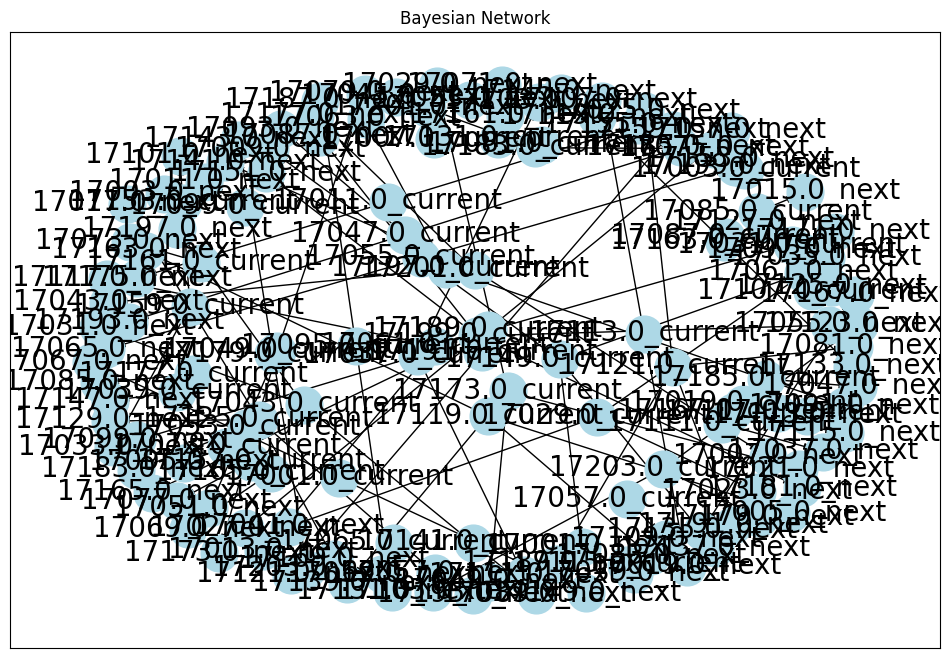

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from matplotlib.animation import FuncAnimation

# Assuming 'bn' is your Bayesian Network from pgmpy
def draw_bn(bn, pos=None):
    """ Draw the Bayesian network using a given node position layout. """
    G = nx.DiGraph()
    G.add_edges_from(bn.edges())
    pos = pos or nx.spring_layout(G)  # positions for all nodes

    plt.figure(figsize=(12, 8))
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    # edges
    nx.draw_networkx_edges(G, pos, arrows=True)
    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title('Bayesian Network')
    plt.show()
    return pos

# Draw the initial Bayesian Network
pos = draw_bn(bn)

# If you want to update the visualization based on new data or model changes:
def update_bn(new_bn):
    """ Update the visualization with a new Bayesian Network model. """
    plt.clf()  # Clear the current figure
    draw_bn(new_bn, pos=pos)

# For animation (if needed), you'll need to setup FuncAnimation
def animate(i):
    # Generate or load a new Bayesian Network model here for the i-th frame
    new_bn = generate_new_bn_for_frame(i)  # This function needs to be defined based on how you update the model
    update_bn(new_bn)

# Uncomment the following lines to create an animation
# anim = FuncAnimation(plt.gcf(), animate, frames=number_of_frames, interval=1000)
# plt.show()


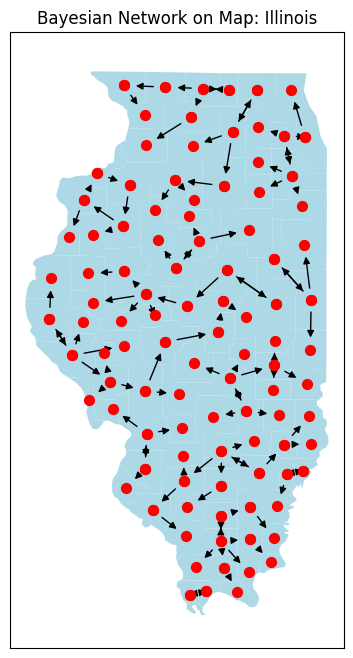

In [35]:
gdf['FIPS'] = gdf['FIPS'].astype(str)  # Ensure FIPS codes are string for matching

# Filter to only include Illinois
illinois_gdf = gdf[gdf['STATE_NAME'] == 'Illinois']
illinois_gdf.set_index('FIPS', inplace=True)

# Assuming 'bn' is your Bayesian Network from pgmpy
def draw_geographical_bn(bn, gdf):
    G = nx.DiGraph()
    G.add_edges_from(bn.edges())

    # Preprocess node names to extract FIPS codes correctly
    def preprocess_node(node):
        # Extract numeric part properly; assumes FIPS is before first underscore
        fips_match = re.search(r'\d+', node)
        if fips_match:
            return fips_match.group()[:5]  # Ensure it's the correct length
        return None  # Return None if no match is found

    # Calculate positions based on the centroids of the geographic areas
    pos = {}
    missing_fips = []
    for node in G.nodes():
        fips = preprocess_node(node)
        if fips and fips in gdf.index:
            pos[node] = (gdf.loc[fips].geometry.centroid.x, gdf.loc[fips].geometry.centroid.y)
        else:
            missing_fips.append(node)

    if missing_fips:
        print("Missing positions for nodes:", missing_fips)

    # Create a plot of the geographic data
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf.plot(ax=ax, color='lightblue')  # Adjust the color as needed

    # Draw the network if positions were found
    if pos:
        nx.draw_networkx_nodes(G, pos, ax=ax, node_size=50, node_color='red')
        nx.draw_networkx_edges(G, pos, ax=ax, arrows=True)
#         nx.draw_networkx_labels(G, pos, ax=ax, font_size=12, font_color='green')

    plt.title('Bayesian Network on Map: Illinois')
    plt.show()

# Example function call
draw_geographical_bn(bn, illinois_gdf)

In [38]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

def model_train(data, potential_edges): 
    # Initialize the Hill Climb Search
    hcs = HillClimbSearch(data)

    # Define the scoring function using BIC
    bic = BicScore(data)

    # Run the Hill Climb Search using the potential edges as a whitelist and set the scoring method here
    best_model = hcs.estimate(white_list=potential_edges, scoring_method=bic)
    print(best_model)
    
    # Initialize Bayesian Network with the best model structure found
    bayesian_network = BayesianNetwork(best_model.edges())
    
    # Fit the CPDs using the data
    bayesian_network.fit(data)
    
    return bayesian_network, best_model

# Assuming `hill_climb_data` is already defined and processed
# and `potential_edges` is a list of tuples indicating possible edges
bn, best_model_structure = model_train(hill_climb_data, potential_edges)

# Now you can access the fitted CPDs in your Bayesian Network using `bn.get_cpds()`
cpds = bn.get_cpds()


  0%|          | 0/1000000 [00:00<?, ?it/s]

DAG with 204 nodes and 102 edges


In [39]:
for cpd in cpds:
    print(cpd)


+------------------------+----------+
| 17001.0_current(bin_1) | 0.206612 |
+------------------------+----------+
| 17001.0_current(bin_2) | 0.198347 |
+------------------------+----------+
| 17001.0_current(bin_3) | 0.198347 |
+------------------------+----------+
| 17001.0_current(bin_4) | 0.198347 |
+------------------------+----------+
| 17001.0_current(bin_5) | 0.198347 |
+------------------------+----------+
+---------------------+-----+------------------------+
| 17001.0_current     | ... | 17001.0_current(bin_5) |
+---------------------+-----+------------------------+
| 17067.0_next(bin_1) | ... | 0.0                    |
+---------------------+-----+------------------------+
| 17067.0_next(bin_2) | ... | 0.0                    |
+---------------------+-----+------------------------+
| 17067.0_next(bin_3) | ... | 0.0                    |
+---------------------+-----+------------------------+
| 17067.0_next(bin_4) | ... | 0.16666666666666666    |
+---------------------+-----+---

In [41]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(bn)
result = inference.query(variables=['17203.0_current'])
print(result)


+------------------------+------------------------+
| 17203.0_current        |   phi(17203.0_current) |
+========================+========================+
| 17203.0_current(bin_1) |                 0.2231 |
+------------------------+------------------------+
| 17203.0_current(bin_2) |                 0.1901 |
+------------------------+------------------------+
| 17203.0_current(bin_3) |                 0.1901 |
+------------------------+------------------------+
| 17203.0_current(bin_4) |                 0.1983 |
+------------------------+------------------------+
| 17203.0_current(bin_5) |                 0.1983 |
+------------------------+------------------------+


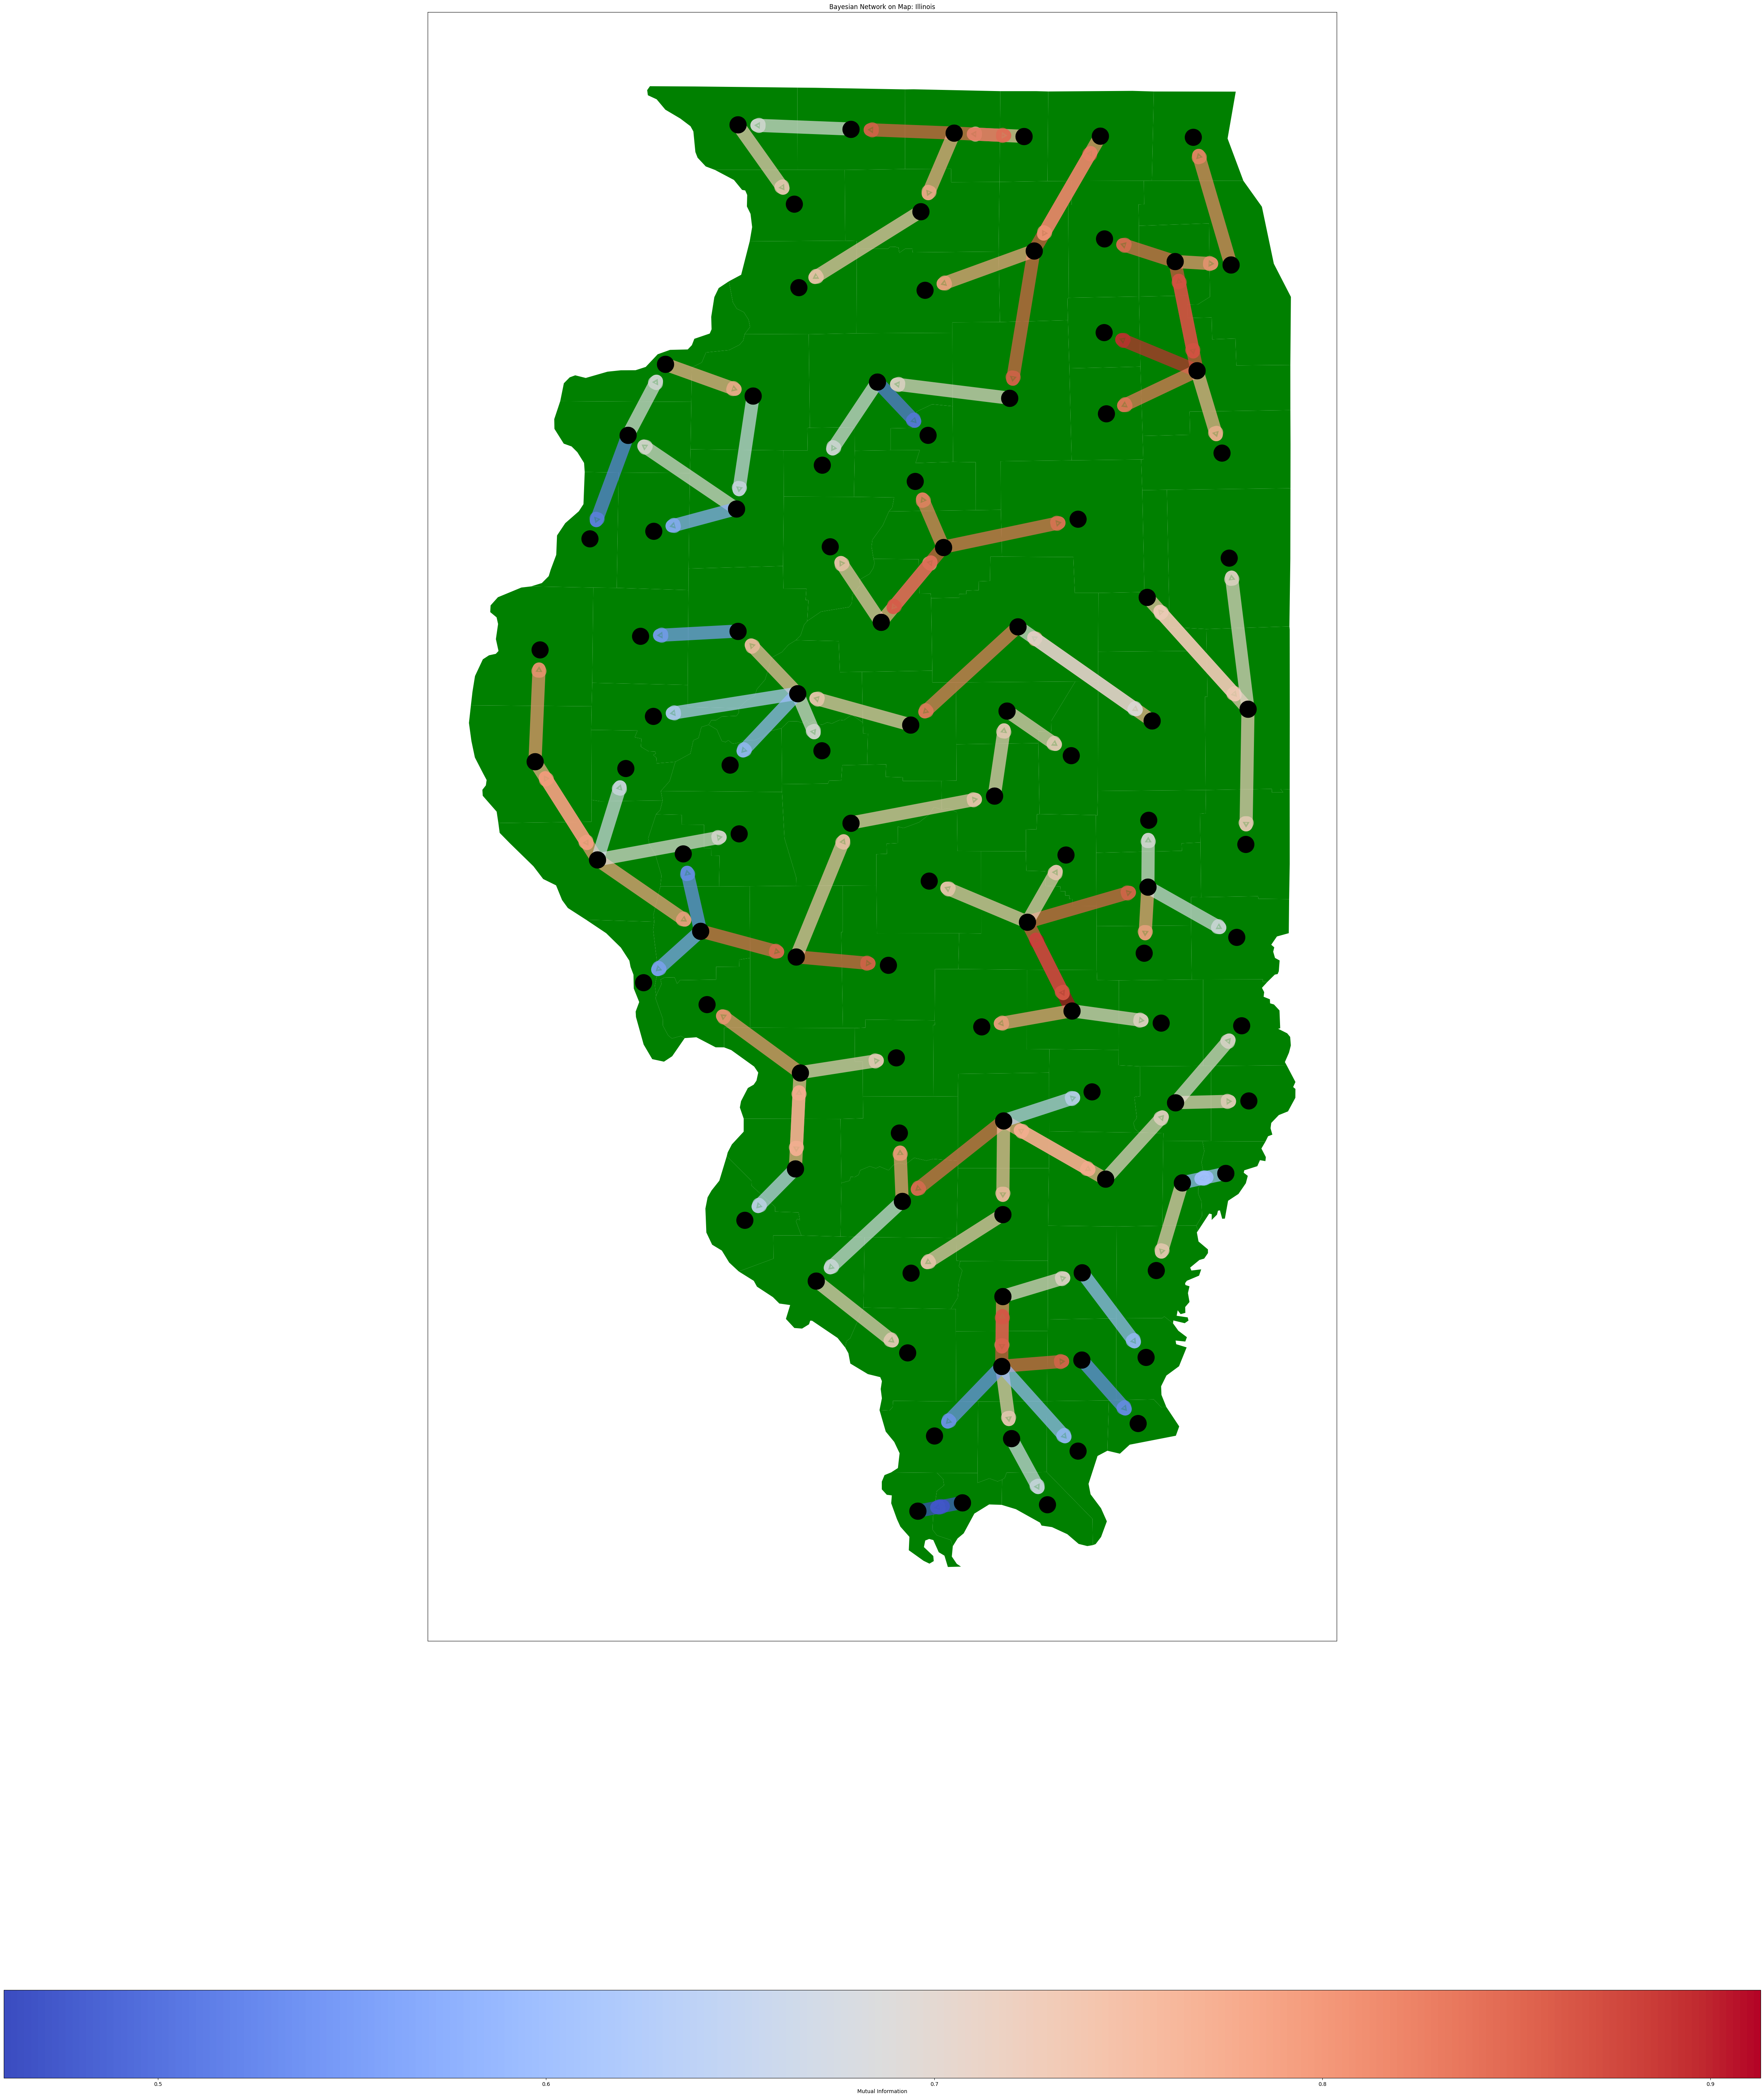

In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import re
import numpy as np
from pgmpy.inference import VariableElimination
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Assuming gdf has been loaded with the geographic data beforehand
gdf['FIPS'] = gdf['FIPS'].astype(str)  # Ensure FIPS codes are string for matching

# Filter to only include Illinois
illinois_gdf = gdf[gdf['STATE_NAME'] == 'Illinois']
illinois_gdf.set_index('FIPS', inplace=True)

# Assuming 'bn' is your Bayesian Network from pgmpy already trained and contains CPDs
def mutual_information_manual(bn, X, Y):
    inference = VariableElimination(bn)
    joint_dist = inference.query(variables=[X, Y], joint=True)
    P_XY = joint_dist.values
    P_X = np.sum(P_XY, axis=1)
    P_Y = np.sum(P_XY, axis=0)

    MI = 0
    for x in range(len(P_X)):
        for y in range(len(P_Y)):
            if P_XY[x, y] > 0 and P_X[x] > 0 and P_Y[y] > 0:
                MI += P_XY[x, y] * np.log(P_XY[x, y] / (P_X[x] * P_Y[y]))
    return MI

def draw_geographical_bn(bn, gdf):
    G = nx.DiGraph()
    G.add_edges_from(bn.edges())

    # Compute mutual information for each edge and store it with the edge data
    edge_mi = {(edge[0], edge[1]): mutual_information_manual(bn, edge[0], edge[1]) for edge in G.edges()}

    # Normalize the mutual information scores for coloring
    mi_values = list(edge_mi.values())
    norm = Normalize(vmin=min(mi_values), vmax=max(mi_values))
    cmap = plt.cm.coolwarm

    # Calculate positions based on the centroids of the geographic areas
    pos = {}
    for node in G.nodes():
        fips = re.search(r'\d+', node)
        if fips and fips.group()[:5] in gdf.index:
            pos[node] = (gdf.loc[fips.group()[:5]].geometry.centroid.x, gdf.loc[fips.group()[:5]].geometry.centroid.y)

    # Create a plot of the geographic data
    fig, ax = plt.subplots(1, 1, figsize=(120, 80))
    gdf.plot(ax=ax, color='green')  # Adjust the color as needed

    # Create a ScalarMappable for color mapping the mutual information
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Draw the network if positions were found
    if pos:
        nx.draw_networkx_nodes(G, pos, ax=ax, node_size=1000, node_color='black')
        # Draw edges with colors based on mutual information
        for edge in G.edges():
            mi = edge_mi[edge]
            nx.draw_networkx_edges(G, pos, edgelist=[edge], width=25,
                                   edge_color=[cmap(norm(mi))], alpha=0.7)
        # Add colorbar using the ScalarMappable
        plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, label='Mutual Information')

    plt.title('Bayesian Network on Map: Illinois')
    plt.show()

# Make sure 'bn' is your trained Bayesian Network object
draw_geographical_bn(bn, illinois_gdf)
